In [47]:
% cd /content/drive/MyDrive/multi/0425

/content/drive/MyDrive/multi/0425


In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import numpy as np
import pandas as pd
import seaborn as sns

In [50]:
df = pd.read_csv('./data/train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 1. 데이터 전처리
- Feature Selection

In [51]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked', 'Cabin']]

In [53]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Cabin       687
dtype: int64

In [54]:
# age - 평균으로 대체

df['Age'] = df['Age'].fillna(df['Age'].mean())

In [55]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      2
Cabin       687
dtype: int64

In [56]:
# embarked - 최빈값으로 대체

df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [57]:
df['Embarked'].fillna('S', inplace=True)
df['Embarked'].isnull().sum()

0

In [58]:
df.drop(labels=['Cabin'], axis=1, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [60]:
df.isnull().sum().any()

False

- Category 값을 숫자로 변환

In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [62]:
df.Sex = le.fit_transform(df.Sex)
df.Embarked = le.fit_transform(df.Embarked)

In [63]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### 2. Train/Test dataset으로 분리

In [64]:
from sklearn.model_selection import train_test_split

## values를 붙여 numpy array로 변환

X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [65]:
X.shape, y.shape

((891, 7), (891,))

In [66]:
# df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True)
np.unique(y, return_counts=True)

(array([0, 1]), array([549, 342]))

In [67]:
# train/test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    test_size=0.2, random_state = 2022)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [68]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([439, 273]))

### 3. RandomForest 모델로 학습

In [69]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=2022)
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2022,
 'verbose': 0,
 'warm_start': False}

In [70]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=2022)

In [71]:
rfc.score(X_test, y_test)

0.8324022346368715

### 5. GridSearchCV (hyper parameter tuning)

In [72]:
params = {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6]
}

In [73]:
from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(rfc, params, scoring='accuracy', cv=5)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2022),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6]},
             scoring='accuracy')

In [74]:
grid_rf.best_params_

{'max_depth': 4, 'min_samples_split': 4}

In [75]:
params = {
    'max_depth': [3,4,5],
    'min_samples_split': [3,4,5]
}

In [76]:
grid_rf = GridSearchCV(rfc, params, scoring='accuracy', cv=5)
%time grid_rf.fit(X_train, y_train)

CPU times: user 7.36 s, sys: 51.8 ms, total: 7.41 s
Wall time: 7.43 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2022),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [3, 4, 5]},
             scoring='accuracy')

In [77]:
grid_rf.best_params_

{'max_depth': 4, 'min_samples_split': 3}

In [78]:
best_rf = grid_rf.best_estimator_
best_rf.score(X_test, y_test)

0.8212290502793296

### 6. 테스트 데이터에 적용

In [79]:
X_test[4], y_test[4]

(array([ 1.        ,  1.        , 29.69911765,  0.        ,  0.        ,
        26.55      ,  2.        ]), 0)

In [80]:
best_rf.predict(X_test[4].reshape(1,-1))[0]

0

###7. 엉터리 분류기

In [81]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Survived vs Sex')

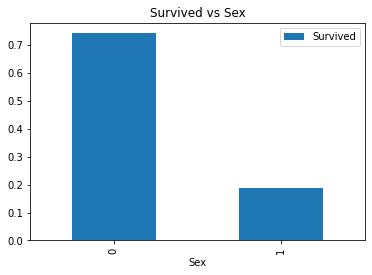

In [85]:
# 남/녀 생존률(남:1, 여:0)

df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()
plt.title('Survived vs Sex')

In [86]:
df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex  Pclass
0    1         0.968085
     2         0.921053
     3         0.500000
1    1         0.368852
     2         0.157407
     3         0.135447
Name: Survived, dtype: float64

In [87]:
from sklearn.base import BaseEstimator

{}

In [120]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [139]:
class MyClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
        
    def predict(self, X):
        pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            if X[i,1] == 0: # 여성이면 생존
                pred[i] = 1
            
        return pred      

    def accuracy_score(self, y, pred):
        score = 0
        for i in range(len(pred)):
            if y[i] == pred[i]:
                score+=1
        
        return float(score / len(pred))

In [147]:
myC = MyClassifier()
myC.fit(X_train, y_train)
my_pred = myC.predict(X_test)
myC.accuracy_score(y_test, my_pred)

0.7877094972067039

- 모델의 성능을 평가할 때 무조건적으로 정확도를 사용하는 것은 지양해야 함.

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0])

In [154]:
# confusion matrix

from sklearn.metrics import confusion_matrix as cm

pred_rf = best_rf.predict(X_test)
sdf = pd.DataFrame({'y': y_test, 'rf' : pred_rf, 'my': my_pred.astype(int)})
sdf.head()

,y,rf,my
0,1,0,0
1,0,0,0
2,1,0,1
3,0,0,0
4,0,0,0


In [155]:
cm(y_test, pred_rf)

array([[103,   7],
       [ 25,  44]])

In [156]:
cm(y_test, my_pred)

array([[96, 14],
       [24, 45]])

In [160]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test, my_pred)) # TP / (TP + FP)
print(recall_score(y_test,my_pred)) # TP / (TP + FN)

0.7627118644067796
0.6521739130434783


In [159]:
print(precision_score(y_test, pred_rf)) # TP / (TP + FP)
print(recall_score(y_test,pred_rf)) # TP / (TP + FN)

0.8627450980392157
0.6376811594202898


In [161]:
f1 = f1_score(y_test, my_pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7031


In [162]:
f1 = f1_score(y_test, pred_rf)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7333


In [163]:
# ROC-AUC Score

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred_rf), roc_auc_score(y_test, my_pred)

(0.787022397891963, 0.7624505928853755)